In [1]:
import pandas as pd
import os
file_path = os.path.join("..", "data", "News_Category_Dataset_v3.json")
df = pd.read_json(file_path, lines=True) 
# print(df.head())   #  To check the dataset with Displaying the head of news dataset
print(df['category'].value_counts())  # To check the dataset with Displaying the count of each category



category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

In [2]:
import re
import nltk

# Ensure nltk is properly initialized
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords

# TO clean the text data in the headlines
# Lowercase
# Remove special characters
# Remove stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned'] = df['headline'].apply(clean_text)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Use TF-IDF (it turns text into numbers that models can understand):

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned'])

# Labels (Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['category'])


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import MultinomialNB
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

#logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [5]:
#Evaluate the models
from sklearn.metrics import accuracy_score, classification_report

y_pred_nb = model_nb.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_dt = model_dt.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb, target_names=le.classes_))
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_lr, target_names=le.classes_))
print("Classification Report for Decision Tree:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))


Naive Bayes Accuracy: 0.4950126473536009
Logistic Regression Accuracy: 0.5472963298811626
Decision Tree Accuracy: 0.4249272180594664
Classification Report for Naive Bayes:
                precision    recall  f1-score   support

          ARTS       0.22      0.01      0.01       293
ARTS & CULTURE       0.33      0.00      0.01       275
  BLACK VOICES       0.54      0.12      0.20       889
      BUSINESS       0.52      0.26      0.35      1216
       COLLEGE       0.33      0.01      0.02       202
        COMEDY       0.64      0.27      0.38      1022
         CRIME       0.51      0.50      0.50       713
CULTURE & ARTS       0.95      0.10      0.19       202
       DIVORCE       0.83      0.46      0.59       664
     EDUCATION       0.57      0.02      0.04       209
 ENTERTAINMENT       0.45      0.74      0.56      3419
   ENVIRONMENT       0.94      0.10      0.18       313
         FIFTY       0.67      0.01      0.02       263
  FOOD & DRINK       0.58      0.63      0.

c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

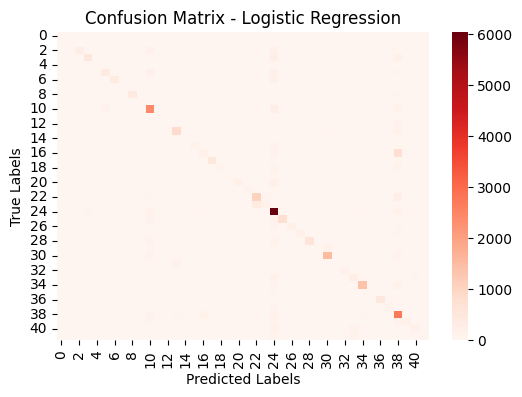

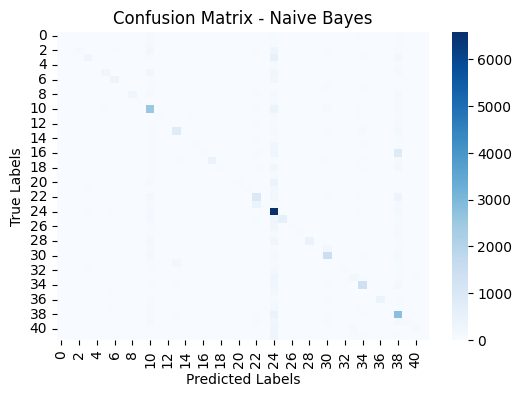

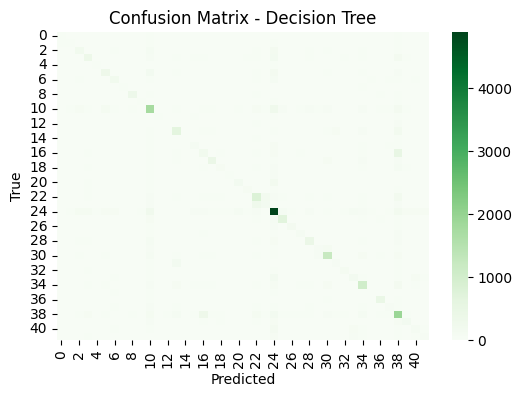

In [12]:
# Visualize the results with Confusion matrix 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Evaluating Logistic Regression
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=False, cmap='Reds')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#Evaluating Naive Bayes
cm = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=False, cmap='Blues')
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

#evaluating Decision Tree
cm = confusion_matrix(y_test, y_pred_dt)  
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=False, cmap='Greens')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show() 


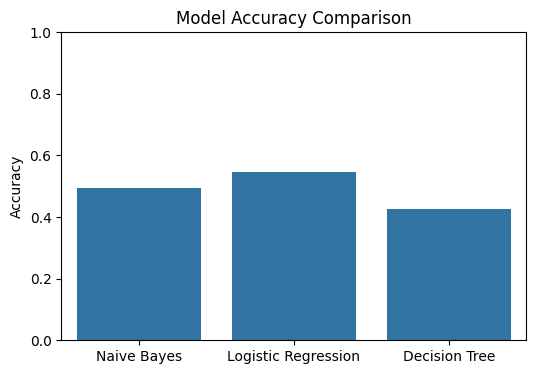

In [13]:
#visiualizing with accuracy Comparison of three models 

nb_accuracy = accuracy_score(y_test, y_pred_nb)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Plot
plt.figure(figsize=(6, 4))
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree']
accuracies = [nb_accuracy, lr_accuracy, dt_accuracy]

sns.barplot(x=models, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()


In [8]:
#saving the model
import joblib
file_path = os.path.join("..", "models", "saved_model.pkl")
directory = os.path.dirname(file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
joblib.dump(model_lr, file_path)


['..\\models\\saved_model.pkl']